# Importing libraries and exploring datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False )
#we're setting the style of the notebook to be monokai theme (to see xa nd y axes clearly)

In [16]:
tweets_df = pd.read_csv('twitter.csv')
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [17]:
tweets_df.drop("id", inplace=True, axis=1)
tweets_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


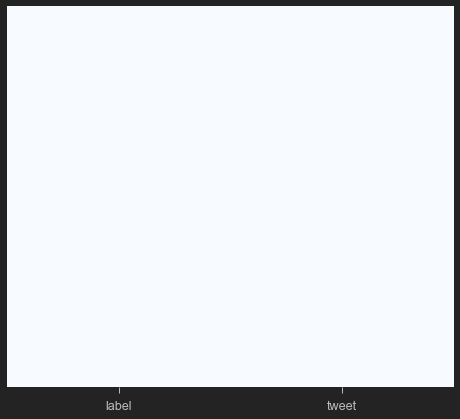

In [20]:
sns.heatmap(tweets_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")  #NO NULLS

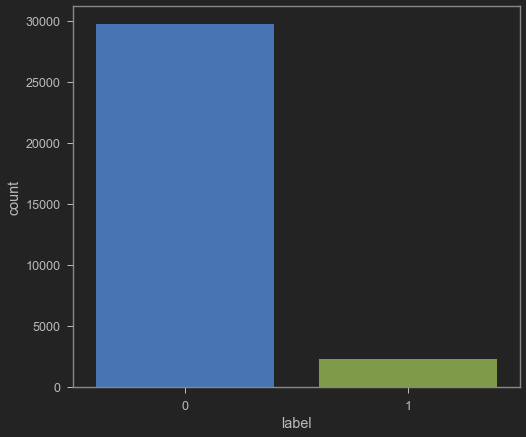

In [22]:
sns.countplot(x = 'label', data=tweets_df)

In [32]:
#We want to get the length of the tweets
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [34]:
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


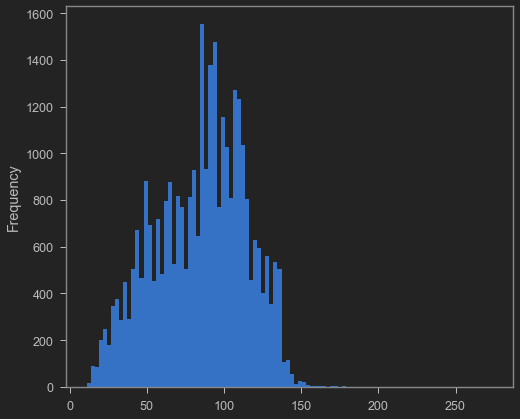

In [35]:
tweets_df['length'].plot(bins=100, kind='hist')

In [44]:
tweets_df[tweets_df['length'] ==11]['tweet'].iloc[0] #shortest tweet

'i love you '

In [42]:
tweets_df[tweets_df['length'] ==85]['tweet'] #average tweets

115       â #under the spell of brexit referendum - c...
242      make today count! #mondaymotivation #livelifet...
384      dream palace, can we move in already? #stellar...
573      @user monkeys are also declared as vermin. no ...
634      save thousands $$ free search x logins x broke...
                               ...                        
31393    #flagday2016   #flag #day #2016 #(30 #photos) ...
31468    jts88troxy theater   jts88@user ð #love #si...
31542    stretched to the limit and still #waiting pati...
31773    this reminds me of this. i am   love these two...
31799    can #lighttherapy help with   or #depression? ...
Name: tweet, Length: 387, dtype: object

In [45]:
positive = tweets_df[tweets_df['label'] == 0]
negative = tweets_df[tweets_df['label'] == 1]

# Plotting the wordcloud

In [46]:
sentences = tweets_df['tweet'].tolist()
sentences

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! ",
 ' â\x86\x9d #ireland consume

In [47]:
len(sentences)

31962

In [48]:
sentences_string = " ".join(sentences)

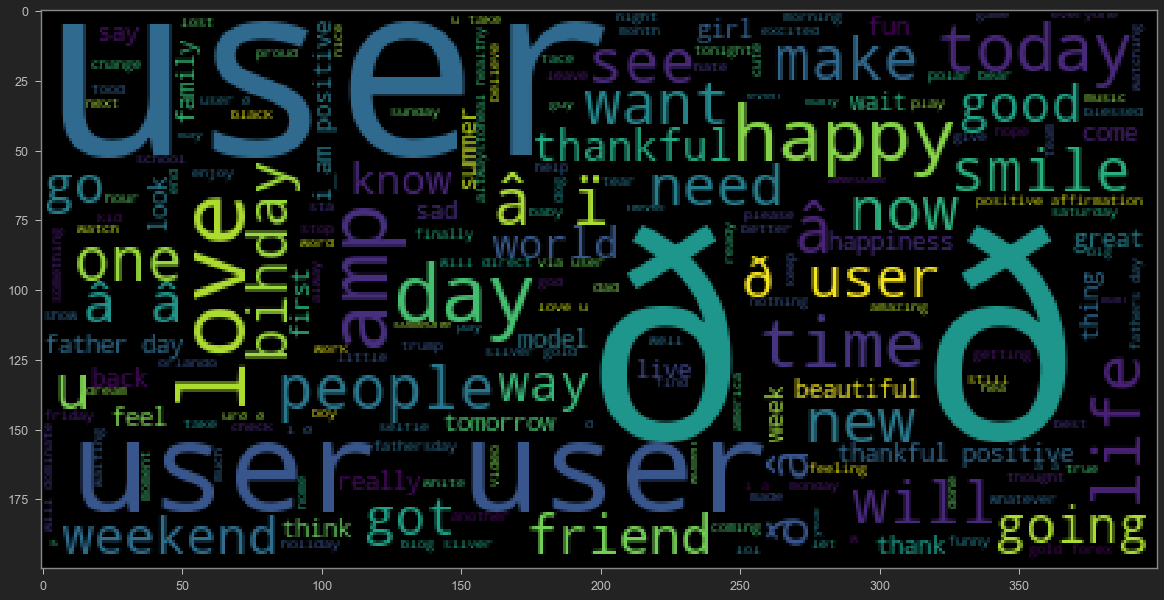

In [50]:
!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_string))

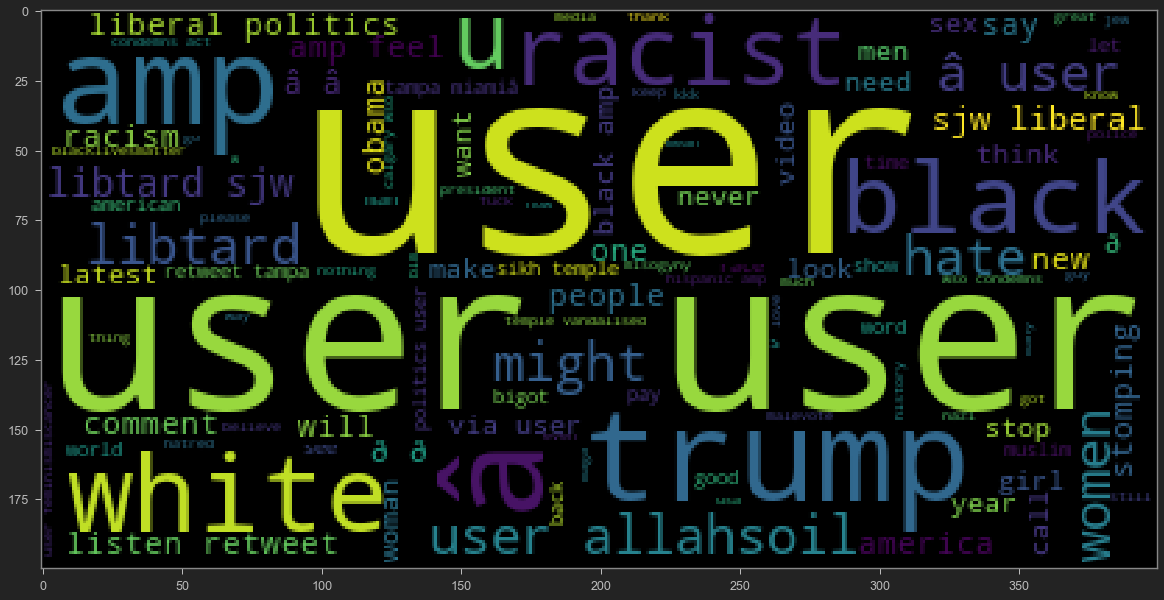

In [51]:
neg_sent = negative["tweet"].tolist()
neg_string = ' '.join(neg_sent)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neg_string))

# Data cleaning

#### Removing punctuation

In [52]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [54]:
Test = "Goood morning ;)) How are you? I am learming Machine learning and AI..."

In [59]:
Test_rem_punc = [char for char in Test if char not in string.punctuation]
Test_rem_punc = ''.join(Test_rem_punc)
Test_rem_punc

'Goood morning  How are you I am learming Machine learning and AI'

#### Removing stopwords

In [56]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [60]:
Test_clean = [word for word in Test_rem_punc.split() if word.lower() not in stopwords.words('english')]
Test_clean

['Goood', 'morning', 'learming', 'Machine', 'learning', 'AI']

In [62]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

In [64]:
mini_challenge_clean = [char for char in mini_challenge if char not in string.punctuation]
mini_challenge_clean = ''.join(mini_challenge_clean)
mini_challenge_clean = [word for word in mini_challenge_clean.split() if word.lower() not in stopwords.words('english')]
mini_challenge_clean

['mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations']

#### Data tokenization 

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.', 'This paper is the second paper', 'And this is the third one.', 'Is this the first paper?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data) #all the tokenized version of strings

In [66]:
print(vectorizer.get_feature_names())

['and', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [67]:
print(X.toarray())

[[0 1 1 0 1 0 1 0 1]
 [0 0 1 0 2 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 1 0 1 0 1]]


In [68]:
mini_challenge = ["Hello World", "Hello Hello World", "Hello World world world"]

In [70]:
C = vectorizer.fit_transform(mini_challenge)
print(vectorizer.get_feature_names())
print(C.toarray())

['hello', 'world']
[[1 1]
 [2 1]
 [1 3]]


# PIPELINE for data cleaning and vectorization

In [71]:
def message_cleaning(message):
    mess_clean = [ char for char in message if char not in string.punctuation]
    mess_clean = ''.join(mess_clean)
    mess_clean = [word for word in mess_clean.split() if word.lower() not in stopwords.words("english") ]
    return mess_clean

In [72]:
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [73]:
print(tweets_df_clean)

0        [user, father, dysfunctional, selfish, drags, ...
1        [user, user, thanks, lyft, credit, cant, use, ...
2                                        [bihday, majesty]
3        [model, love, u, take, u, time, urð±, ðð...
4                        [factsguide, society, motivation]
                               ...                        
31957    [ate, user, isz, youuuðððððð...
31958    [see, nina, turner, airwaves, trying, wrap, ma...
31959    [listening, sad, songs, monday, morning, otw, ...
31960    [user, sikh, temple, vandalised, calgary, wso,...
31961                                [thank, user, follow]
Name: tweet, Length: 31962, dtype: object


In [86]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning) #this is cleaning faster!! without before 
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype='uint8').fit_transform(tweets_df['tweet']) 

In [87]:
tweets_countvectorizer.shape

(31962, 47386)

In [91]:
X = tweets_countvectorizer
y = tweets_df['label']
print(X.shape)
print(y.shape)

(31962, 47386)
(31962,)


# TRAINING A NAIVE BAYES CLASSIFIER MODEL

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #20% of data will be allocated for training

In [104]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Assessing trained model performance

In [105]:
from sklearn.metrics import classification_report, confusion_matrix

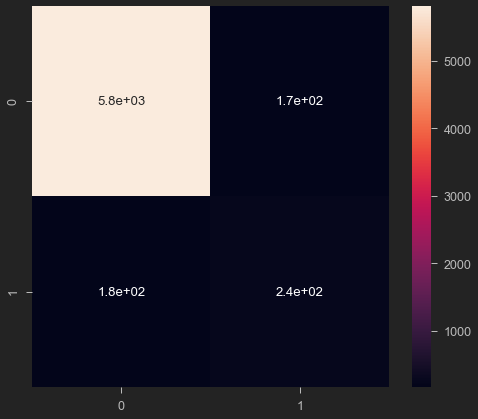

In [107]:
#Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot =True)

In [108]:
print(classification_report(y_test, y_predict_test)) #we had unbalanced dataset

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5977
           1       0.59      0.57      0.58       416

    accuracy                           0.95      6393
   macro avg       0.78      0.77      0.78      6393
weighted avg       0.95      0.95      0.95      6393



# LOGISTIC REGRESSION CLASSIFIER

In [110]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

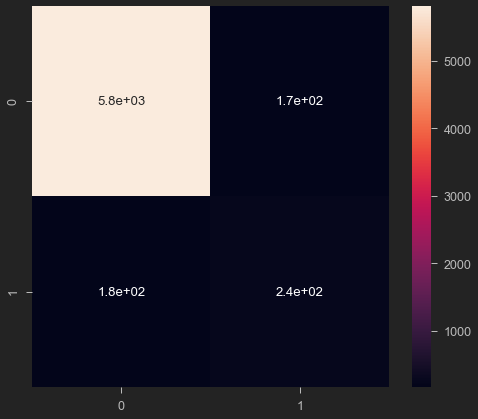

In [111]:
y_predict_test2 = LR_classifier.predict(X_test)
cm2 = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm2, annot =True)